# Simple Visualisation

Lets start with the basic exercise with simple data

## Imports 

In [2]:
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

## Rendering Options

In [3]:
%matplotlib inline

For altair people
- If you are running, jupyter lab / colab - dont need need anything else
- If you are running jupyter notebook, then enable notebook renderer

In [9]:
# Only for Jupyter Notebook
# alt.renderers.enable('notebook')

## Data

In [12]:
sample = pd.read_csv("data/sample.csv")
sample

,area,sales,profit
0,North,5,2
1,East,25,8
2,West,15,6
3,South,20,5
4,Central,10,3


In [13]:
sample.shape

(5, 3)

## Visualisation Grammar

- Data: Raw dataset
- Mark: Geometrics Shape: Point, Circle
- Encoding Channels: X, Y, Shape, Color, Size, ....

### Create Chart Object and add data

In [16]:
vis = alt.Chart(sample)

### Mark & Encoding

In [17]:
alt.Chart(sample).mark_point()

In [20]:
sample.dtypes

area      object
sales      int64
profit     int64
dtype: object

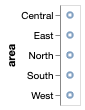

In [19]:
alt.Chart(sample).mark_point().encode(y = "area")

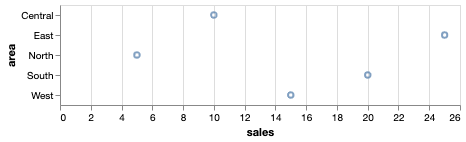

In [21]:
alt.Chart(sample).mark_point().encode(
    y = "area",
    x = "sales"
)

### Marks

- bar
- point
- circle
- line

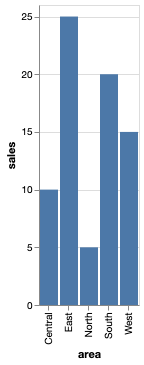

In [32]:
alt.Chart(sample).mark_bar().encode(
    x = "area:N",
    y = "sales:Q"
)

### Encoding

- Position Channels: X, Y, X2, Y2
- Color
- Size
- Shape
- ...

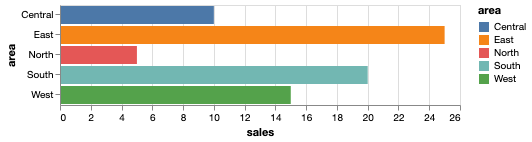

In [34]:
alt.Chart(sample).mark_bar().encode(
    y = "area:N",
    x = "sales:Q",
    color = "area:N"
)

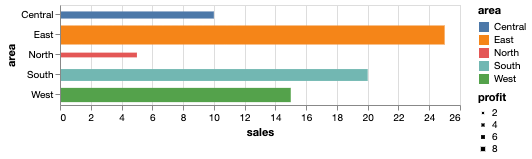

In [35]:
alt.Chart(sample).mark_bar().encode(
    y = "area:N",
    x = "sales:Q",
    color = "area:N",
    size = "profit:Q"
)

# Longhand version

Altair object of X, Y, Color, ...

In [44]:
vis1 = alt.Chart(sample).mark_bar().encode(
    alt.Y(field="area", type="nominal"),
    alt.X(field="sales", type="quantitative"),
    alt.Color(field= "area", type="nominal")
)

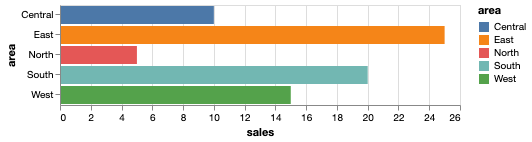

In [45]:
vis1

## Linkage to Vega-lite

In [48]:
print(vis1.to_json())

{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.4.0.json",
  "config": {
    "mark": {
      "tooltip": null
    },
    "view": {
      "height": 300,
      "width": 400
    }
  },
  "data": {
    "name": "data-e9a1bf97bac3c6f8642dc2ef7d8e4b49"
  },
  "datasets": {
    "data-e9a1bf97bac3c6f8642dc2ef7d8e4b49": [
      {
        "area": "North",
        "profit": 2,
        "sales": 5
      },
      {
        "area": "East",
        "profit": 8,
        "sales": 25
      },
      {
        "area": "West",
        "profit": 6,
        "sales": 15
      },
      {
        "area": "South",
        "profit": 5,
        "sales": 20
      },
      {
        "area": "Central",
        "profit": 3,
        "sales": 10
      }
    ]
  },
  "encoding": {
    "color": {
      "field": "area",
      "type": "nominal"
    },
    "x": {
      "field": "sales",
      "type": "quantitative"
    },
    "y": {
      "field": "area",
      "type": "nominal"
    }
  },
  "mark": "bar"
}


In [50]:
x = alt.X("sales:Q")
print(x.to_json())

{
  "field": "sales",
  "type": "quantitative"
}


## Annotations

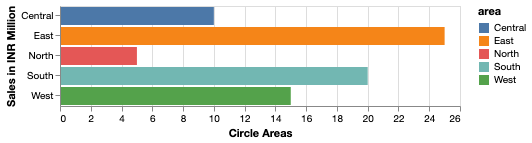

In [54]:
alt.Chart(sample).mark_bar().encode(
    alt.Y("area:N", axis=alt.Axis(title="Sales in INR Million")),
    alt.X("sales:Q", axis=alt.Axis(title="Circle Areas")),
    alt.Color(field= "area", type="nominal")
)

## Compositions

- Layer -> Overlay
- Concat the charts -> Horizontal or Vertical

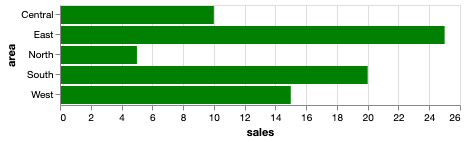

In [60]:
sales_chart = alt.Chart(sample).mark_bar().encode(
    alt.Y("area:N"),
    alt.X("sales:Q"),
    alt.Color(value="green")
)

sales_chart

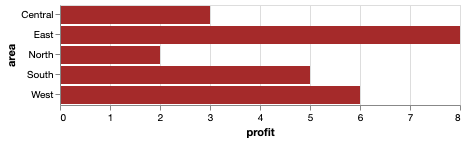

In [65]:
profit_chart = alt.Chart(sample).mark_bar().encode(
    alt.Y("area:N"),
    alt.X("profit:Q"),
    alt.Color(value="brown")
)

profit_chart

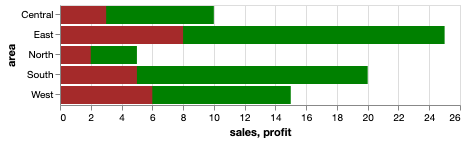

In [66]:
# Layer them - Overlay Styel
sales_chart + profit_chart

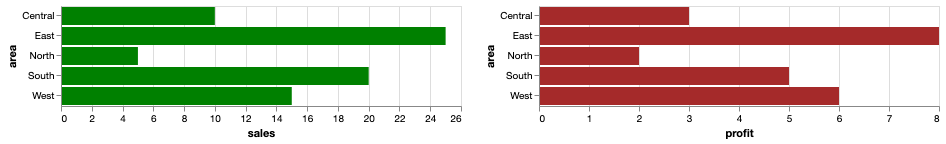

In [67]:
sales_chart | profit_chart

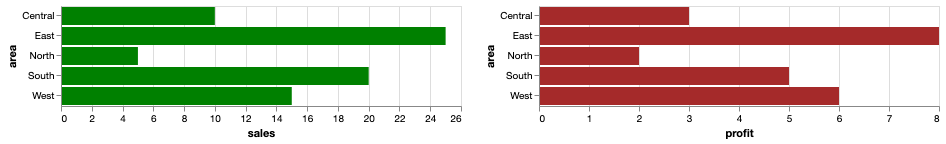

In [73]:
alt.concat(sales_chart, profit_chart)

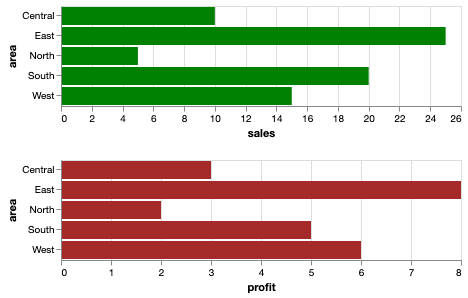

In [77]:
alt.vconcat(sales_chart, profit_chart)

## Interactivity

Basic Interactive - Panning & Zooming

In [98]:
vis2 = alt.Chart(sample).mark_circle().encode(
    alt.Size(value=400),
    alt.Tooltip("area:N"),
    x = "sales:Q",
    y = "profit:Q",
    color = "area:N",
    
).interactive()

In [100]:
vis2.save("simple.html")